### Basic Image Manipulation
<ol>
    <li>Accessing and manipulating image pixels</li>
    <li>Image resizing</li>
    <li>Cropping</li>
    <li>Flipping</li>
</ol>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline

#### Original Checkerboard image

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

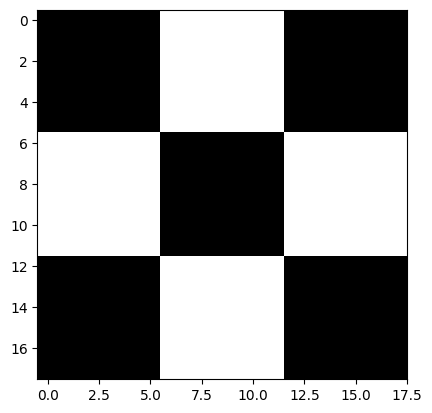

In [2]:
cb_image = cv2.imread("./NB1/checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)
print(cb_image)
plt.imshow(cb_image, cmap='gray')

#### Accessing Individual Pixels

In [3]:
print(cb_image[0,0])
print(cb_image[0,6])

0
255


#### Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

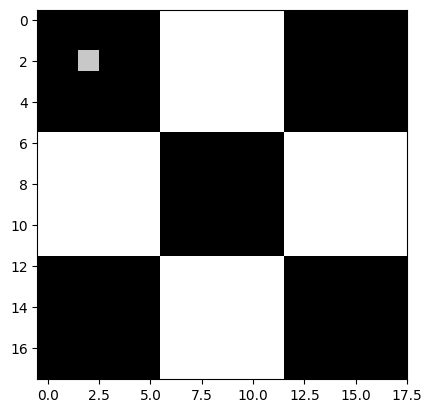

In [4]:
cb_img_copy = cb_image.copy()

cb_img_copy[2:3,2:3] = 200

print(cb_img_copy)

plt.imshow(cb_img_copy, cmap='gray')

#### Cropping images

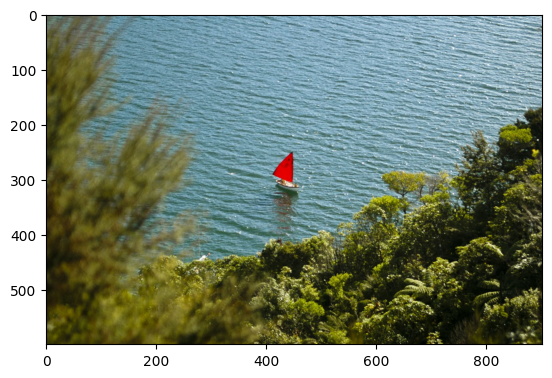

In [6]:
img_nz_bgr = cv2.imread("./NB2/New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_nz_rgb = cv2.cvtColor(img_nz_bgr,cv2.COLOR_BGR2RGB) 
plt.imshow(img_nz_rgb)

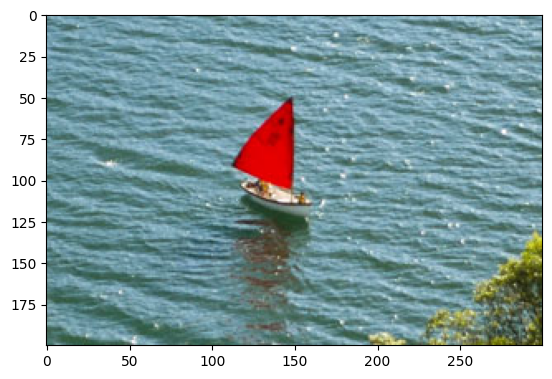

In [8]:
cropped_img = img_nz_rgb[200:400,300:600]
plt.imshow(cropped_img)

#### Resizing Images
```
dst = cv2.resize(src, dsize[, fx[, fy[, interpolation]]])
```

#### Method 1: Specifying the scaling factor

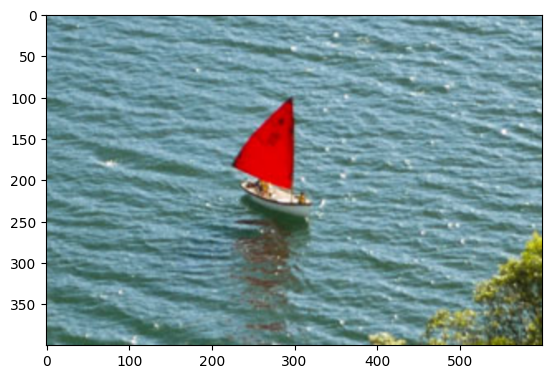

In [9]:
resized_cropped_img_2x = cv2.resize(cropped_img, None, fx=2, fy=2)
plt.imshow(resized_cropped_img_2x)

#### Method 2: Specifying the exact size of the output image

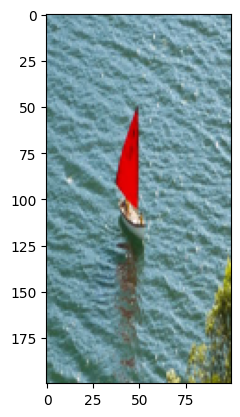

In [10]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resize_cropped_img = cv2.resize(cropped_img, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resize_cropped_img)

#### Resize while maintaining aspect ratio

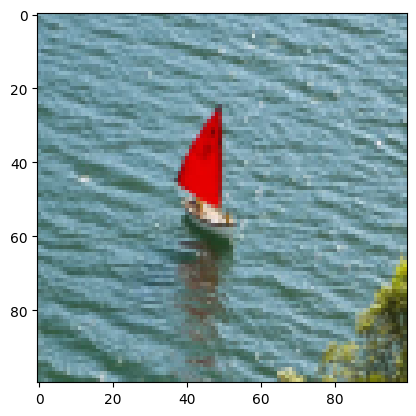

In [12]:
desired_width = 100
aspect_ratio = desired_width/ cropped_img.shape[1]
desired_height = int(cropped_img.shape[1] * aspect_ratio)
dim = (desired_width, desired_height)

resize_cropped_img = cv2.resize(cropped_img, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resize_cropped_img)

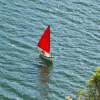

In [13]:
cv2.imwrite("./NB2/Resized_cropped_region_2x.png", cv2.cvtColor(resize_cropped_img, cv2.COLOR_BGR2RGB))
Image("./NB2/Resized_cropped_region_2x.png")

#### Flipping Images
```
dst = cv.flip(src, flipCode)
```

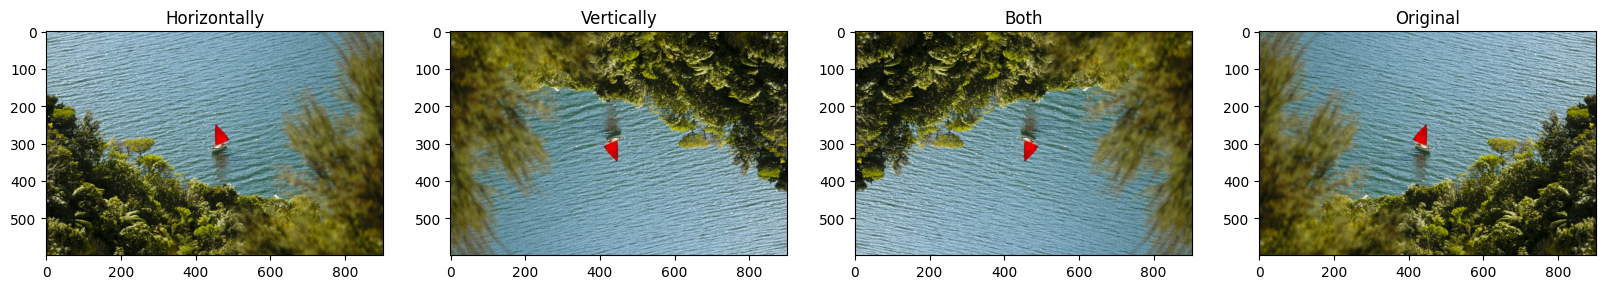

In [14]:
img_nz_flip_horizontal = cv2.flip(img_nz_rgb, 1)
img_nz_flip_vertically = cv2.flip(img_nz_rgb, 0)
img_nz_flip_both = cv2.flip(img_nz_rgb, -1)

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(img_nz_flip_horizontal); plt.title("Horizontally");
plt.subplot(142); plt.imshow(img_nz_flip_vertically); plt.title("Vertically");
plt.subplot(143); plt.imshow(img_nz_flip_both); plt.title("Both");
plt.subplot(144); plt.imshow(img_nz_rgb); plt.title("Original");